## NAMA : NUR FAIZAH
## NIM  : 09011181722027
## KELAS: SK5A

# RANCANG BANGUN ALAT PENDETEKSI DEHIDRASI DENGAN METODE FUZZY LOGIC
Dehidrasi adalah kondisi dimana tubuh mengalami kehilangan 5% dari total 60% berat badan pada manusia umumnya, dehidrasi sering kali terjadi tanpa disadari oleh sebagian orang, dan beberapa diantaranya sering mengabaikan kondisi tersebut. Alat pendeteksi dehidrasi ini dibangun dengan memanfaatkan sensor LM35 sebagai pendeteksi suhu lingkungan, Termokopel sebagai pendeteksi suhu tubuh dan sensor GSR (Galvanic Skin Resistance) sebagai monitoring tekanan darah, serta arduino sebagai pusat pengendalian sistem. Dehidrasi akan dideteksi dengan membandingkan nilai dari inputan sensor. Data dari setiap sensor akan diolah dengan menggunakan metode fuzzy logic. data yang dihasilkan akan dikirim ke dalam smartphone android yang terhubung secara wireless melalui bluetooth. Dengan adanya alat pendeteksi diharapkan dapat memberikan informasi dan peringatan jika terdeteksi kondisi dehidrasi pada tubuh.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#### Input
- Tekanan
    rendah (110-130)
    normal (120-150)
    tinggi (140-160)
- Suhu
    normal (28-30)
    hangat (30-33)
    panas  (33-38)
#### Output
- Dehidrasi
    tidak (1-4)
    iya (6-10)
rentang tekanan, suhu, dan dehidrasi

In [2]:
tekanan = ctrl.Antecedent(np.arange(110,160,1),'tekanan')
tekanan_x = np.arange(110,160,1)

In [3]:
suhu = ctrl.Antecedent(np.arange(28,38,1),'suhu')
suhu_x = np.arange(28,38,1)

In [4]:
dehidrasi = ctrl.Antecedent(np.arange(1,10,1),'tekanan')
dehidrasi_x = np.arange(1,10,1)

### FUZZIFIKASI

a. Nilai pada Variabel tekanan ada 3, yaitu:
- Tekanan rendah
$$ Tekanan rendah [x] = 
\begin{cases}
    \frac{(110-x)}{(110-1)} & ; 1 \geq  x \geq\ 110 \\
    0 & ; x \leq 110
\end{cases}
$$

- Tekanan normal
$$ Tekanan normal [x] = 
\begin{cases}
    0 & ; x \leq 1\\
    \frac{(x-1)}{(110-1)} & ;1 \leq x \leq\ 110 \\
    \frac{(150-x)}{(150-110)} & ; 110 \leq  x \leq\ 150 \\
    0 & ; x \geq 150
\end{cases}
$$

- Tekanan tinggi
$$ Tekanan tinggi [x] = 
\begin{cases}
    0 & ; x \leq 110\\
    \frac{(x-110)}{(150-110)} & ;110 \leq x \leq\ 150 \\
\end{cases}
$$

b. Nilai pada Variabel suhu ada 3, yaitu:
- Suhu normal
$$ Suhu normal [x] = 
\begin{cases}
    \frac{(28-x)}{(28-1)} & ; 1 \geq  x \geq\ 28 \\
    0 & ; x \leq 28
\end{cases}
$$

- Suhu hangat
$$ Suhu hangat [x] = 
\begin{cases}
    0 & ; x \leq 28\\
    \frac{(x-1)}{(28-1)} & ; 1 \leq x \leq\ 28 \\
    \frac{(36-x)}{(36-28)} & ; 28 \leq  x \leq\ 36 \\
    0 & ; x \geq 28
\end{cases}
$$

- Suhu panas
$$ Suhu panas [x] = 
\begin{cases}
    0 & ; x \leq 36\\
    \frac{(x-28)}{(36-28)} & ; 28 \leq x \leq\ 36 \\
\end{cases}
$$

c. Nilai pada Variabel dehidrasi ada 2, yaitu:
- Non Dehidrasi
$$ Dehidrasi [z] = 
\begin{cases}
    \frac{(10-z)}{(10-1)} & ; 10 \geq  z \geq\ 10 \\
    0 & ; z \leq 0.1
\end{cases}
$$

- Dehidrasi
$$ dehidrasi [z] = 
\begin{cases}
    \frac{(z-1)}{(10-1)} & ;1 \leq z \leq\ 1 \\
    0 & ; z \geq 1\\
\end{cases}
$$

### INPUT

In [5]:
tekanan['rendah'] = fuzz.trapmf(tekanan.universe, [0, 0, 120, 130])
tekanan['normal'] = fuzz.trapmf(tekanan.universe, [120, 130, 140, 150])
tekanan['tinggi'] = fuzz.trapmf(tekanan.universe, [140, 150, 160, 160])

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


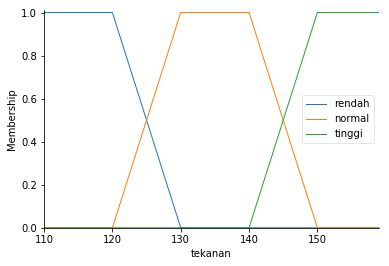

In [6]:
tekanan.view()

In [7]:
suhu['normal'] = fuzz.trapmf(suhu.universe, [0, 0, 30, 32])
suhu['hangat'] = fuzz.trapmf(suhu.universe, [30, 32, 34, 36])
suhu['panas'] = fuzz.trapmf(suhu.universe, [34, 36, 38, 38])

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


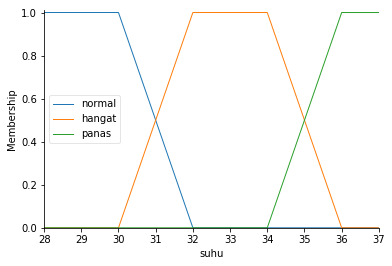

In [8]:
suhu.view()

### OUTPUT

In [9]:
dehidrasi['tidak'] = fuzz.trapmf(dehidrasi.universe, [0, 0, 4, 6])
dehidrasi['iya'] = fuzz.trapmf(dehidrasi.universe, [4, 6, 8, 100])

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


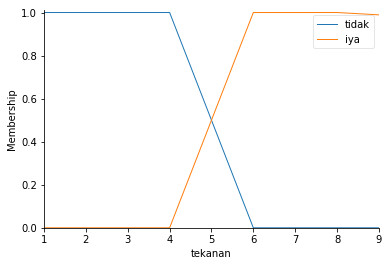

In [10]:
dehidrasi.view()

### Inferencing

berikut akan menggunakan 9 aturan fuzzy yaitu sebagai berikut:

    if tekanan is rendah and suhu is normal then tidak dehidrasi
    if tekanan is rendah and suhu is hangat then dehidrasi
    if tekanan is rendah and suhu is panas then dehidrasi
    if tekanan is normal and suhu is normal then tidak dehidrasi
    if tekanan is normal and suhu is hangat then tidak dehidrasi
    if tekanan is normal and suhu is panas then dehidrasi
    if tekanan is tinggi and suhu is normal then tidak dehidrasi
    if tekanan is tinggi and suhu is hangat then dehidrasi
    if tekanan is tinggi and suhu is panas then dehidrasi

In [11]:
rule1 = ctrl.Rule(tekanan['rendah'] & suhu['normal'], dehidrasi['tidak'])
rule2 = ctrl.Rule(tekanan['rendah'] & suhu['hangat'], dehidrasi['iya'])
rule3 = ctrl.Rule(tekanan['rendah'] & suhu['panas'], dehidrasi['iya'])

rule4 = ctrl.Rule(tekanan['normal'] & suhu['normal'], dehidrasi['tidak'])
rule5 = ctrl.Rule(tekanan['normal'] & suhu['hangat'], dehidrasi['tidak'])
rule6 = ctrl.Rule(tekanan['normal'] & suhu['panas'], dehidrasi['iya'])

rule7 = ctrl.Rule(tekanan['tinggi'] & suhu['normal'], dehidrasi['tidak'])
rule8 = ctrl.Rule(tekanan['tinggi'] & suhu['hangat'], dehidrasi['iya'])
rule9 = ctrl.Rule(tekanan['tinggi'] & suhu['panas'], dehidrasi['iya'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b3973fd0>)

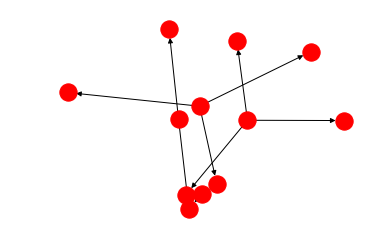

In [12]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b06e1978>)

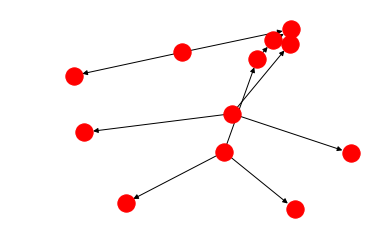

In [13]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b0724908>)

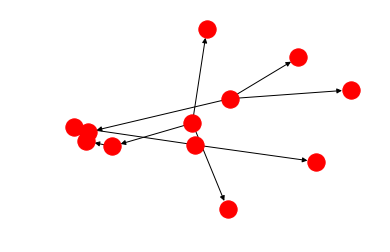

In [14]:
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b07ac668>)

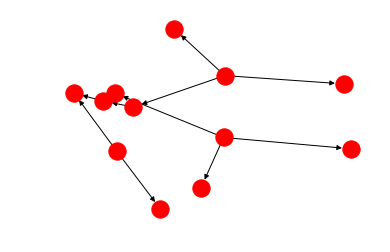

In [15]:
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b3925630>)

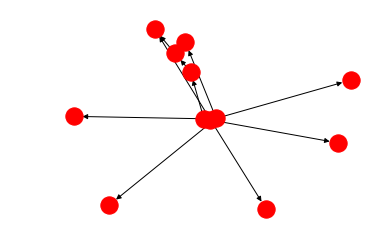

In [16]:
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b3913c50>)

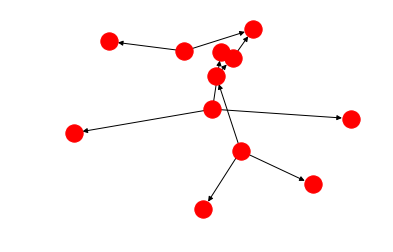

In [17]:
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b07ce828>)

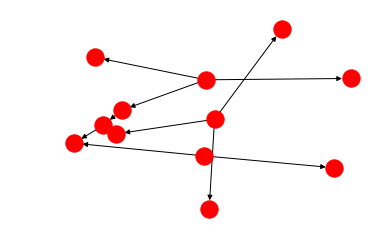

In [18]:
rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b0804da0>)

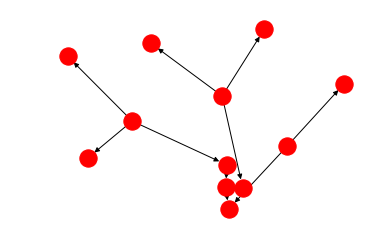

In [19]:
rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3b0863be0>)

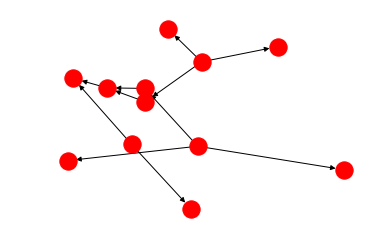

In [20]:
rule9.view()

### RULE EVALUATION

### DEFUZZIFIKASI